In [1]:
import rubin_sim.maf.metricBundles as metricBundles
import rubin_sim.maf.slicers as slicers
import rubin_sim.maf.db as db
import rubin_sim.maf.utils as utils
import rubin_sim.maf.metrics as metrics
import sqlite3
import numpy as np
from rubin_sim.maf.metrics.snNSNMetric import SNNSNMetric
import healpy as hp
%matplotlib inline
import glob

In [2]:
dbfiles = glob.glob('baseline*nexp2*10yrs.db')
dbfiles.sort()

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with no constraint for columns ['filter', 'observationStartMJD', 'observationId', 'night', 'fiveSigmaDepth', 'visitExposureTime', 'fieldDec', 'numExposures', 'fieldRA', 'visitTime'].
Found 2044984 visits
Running:  ['baseline_nexp2_v1_7_1_SNSLMetric_HEAL']


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/slicers/baseSpatialSlicer.py:106: UserWarning: Warning:  Loading maps but cache on.Should probably set useCache=False in slicer.
  warnings.warn('Warning:  Loading maps but cache on.'
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/maps/dustMap.py:24: UserWarning: Slicer value of nside (16) different from map value (128), using slicer value
  warnings.warn('Slicer value of nside (%i) different from map value (%i), using slicer value'


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.


/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(


Plotting complete.


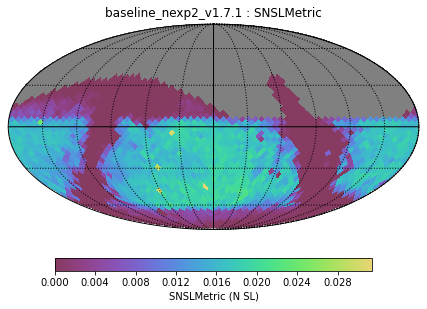

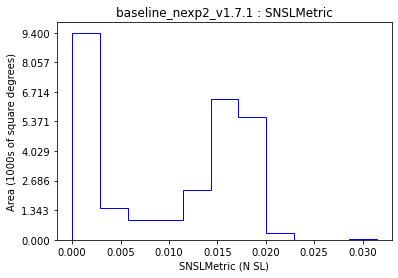

In [4]:
nside = 16
sql = ''
# what is this zlim thingy?
#metric = SNNSNMetric( verbose=False, zlim_coeff=0.98)
metric1 = metrics.SNSLMetric()
#metric2 = SNNSNMetric( dust=True, verbose=False, metricName='SN_dust')

result_list = []
for filename in [dbfiles[0]]:
    opsimdb = db.OpsimDatabase(filename)
    runname = filename.replace('_10yrs.db', '')
    bundleList = []
    slicer = slicers.HealpixSlicer(nside=nside)
    resultsDb = db.ResultsDb(outDir=runname)
    summaryStats = [metrics.MeanMetric(), metrics.MedianMetric(), metrics.SumMetric()]

    bundleList.append(metricBundles.MetricBundle(metric1, slicer,sql,runName=runname, summaryMetrics=summaryStats))
    #bundleList.append(metricBundles.MetricBundle(metric2, slicer,sql,runName=runname, summaryMetrics=summaryStats))
    outDir = runname
    resultsDb = db.ResultsDb(outDir=outDir)
    bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
    bgroup = metricBundles.MetricBundleGroup(bundleDict, opsimdb, outDir=outDir, resultsDb=resultsDb)
    bgroup.runAll()
    bgroup.plotAll(closefigs=False)
    #print(runname, bundleDict['SNNSNMetric_nSN'].summaryValues, bundleDict['SNNSNMetric_zlim'].summaryValues)
    #result_list.append((runname, bundleDict['SNNSNMetric_nSN'].summaryValues, bundleDict['SNNSNMetric_zlim'].summaryValues))
    